<a href="https://colab.research.google.com/github/merasifa/MACHINE_LEARNING/blob/main/JS09_KLASIFIKASI_TIARA_MERA_SIFA_2341720247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA    : TIARA MERA SIFA <br>
NIM     : 2341720247<br>
KELAS   : TI-3B<BR>
LINK    : https://colab.research.google.com/drive/1LKS3DfJujFHjUuRt8Bn_-3zSNgnH3rEo?usp=sharing

# PRAKTIKUM 1

### Langkah 1 - Load Data

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Setelah upload, ambil nama file-nya secara otomatis
filename = list(uploaded.keys())[0]

# Baca file CSV
data = pd.read_csv(filename)
data.head()


Saving iris (1).csv to iris (1) (1).csv


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### Langkah 2 - Eksplorasi Data

In [ ]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Langkah 3 - Visualisasi Data


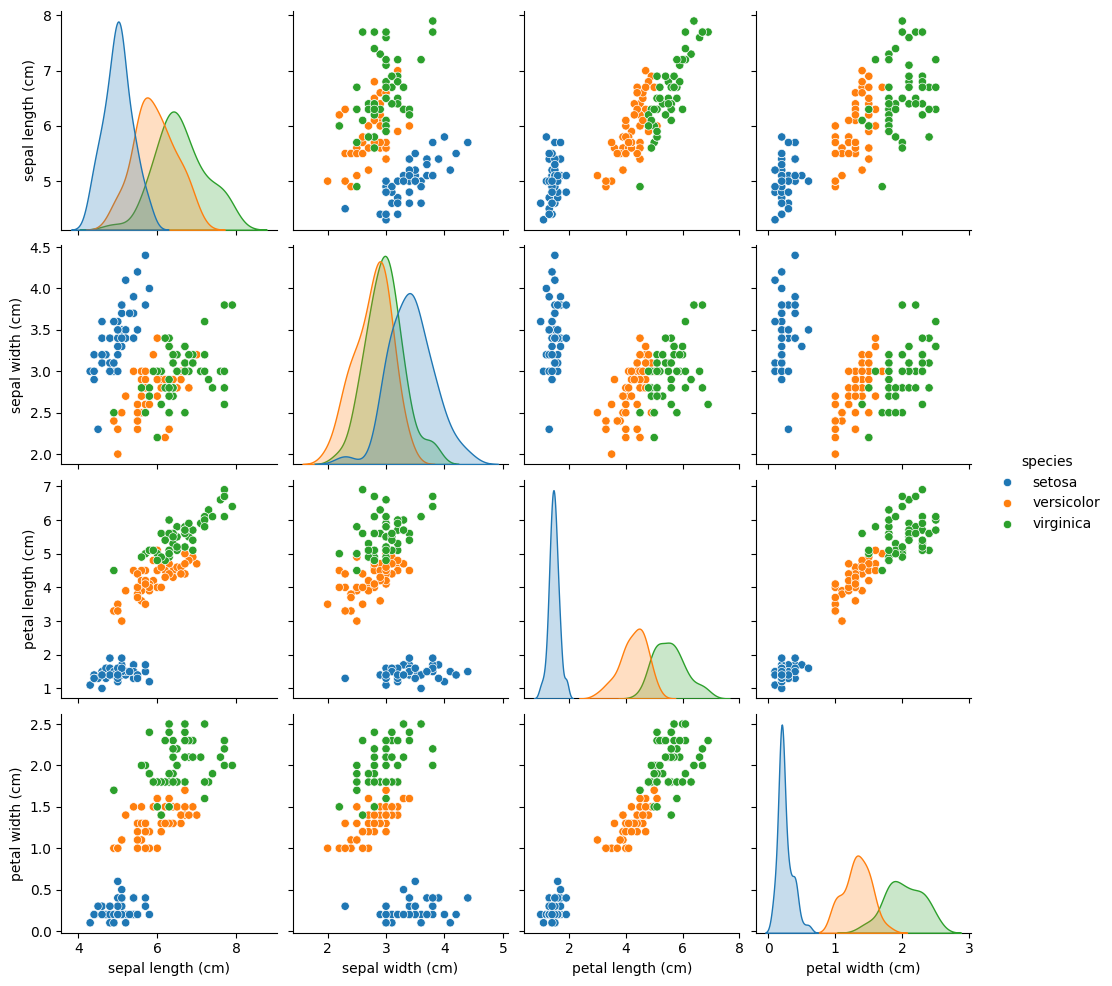

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

### Langkah 4 - Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Langkah 5 - Buat Model kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Langkah 6 - Evaluasi Model kNN

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Evaluasi Nilai K

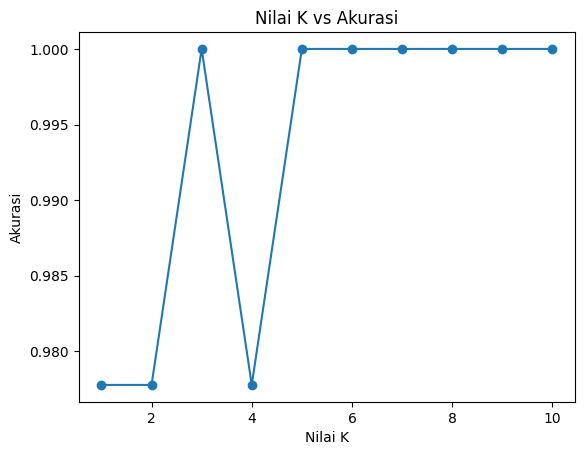

In [ ]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


# PRAKTIKUM 2

### Langkah 1 - Buat Dataset Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[134  11]
 [157  63]
 [247  26]
 [114  95]
 [ 28 108]
 [100  26]
 [167  16]
 [  5 119]
 [196  88]
 [ 17 138]
 [136 114]
 [167  96]
 [161  83]
 [100  85]
 [169  90]
 [ 85 128]
 [  8 112]
 [223 112]
 [138 109]
 [306 102]
 [136  98]
 [  5 104]
 [112 100]
 [ 67  84]
 [113  98]
 [ 73  81]
 [113 114]
 [ 99  96]
 [243 179]
 [  9  44]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


### Langkah 2 (Opsional) - Membuat Data Frame

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

Fitur 1  Fitur 2  Label
0      134       11      0
1      157       63      0
2      247       26      0
3      114       95      0
4       28      108      0

###Langkah 3 (Opsional) - Labeling

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

Fitur 1  Fitur 2    Label
0      134       11  Kelas B
1      157       63  Kelas B
2      247       26  Kelas B
3      114       95  Kelas B
4       28      108  Kelas B

###Langkah 4 - Visualisasi Data

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


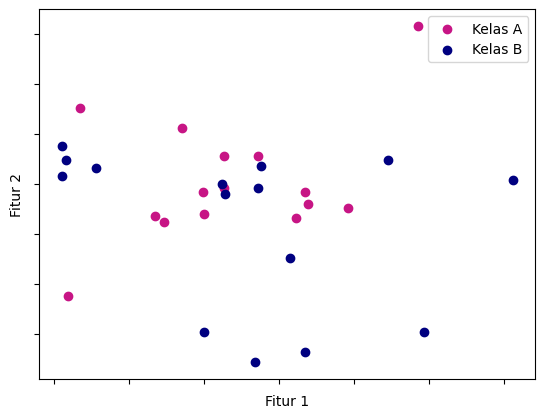

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

###Langkah 5 - Model Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.6666666666666666


###Langkah 6 - Model Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.4444444444444444


#PRAKTIKUM 3

### Langkah 1 - Load Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5572 non-null   object
 1   Labels  5572 non-null   int64 
 2   SMS     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


### Langkah 2 - Preprocessing

#### Langkah 2a - Drop Kolom

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

#### Langkah 2b - Inspeksi Data

In [ ]:
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [ ]:
# Cek Jumlah Data Per Kelas
print(df['v1'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())


v1
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


#### Langkah 2c - Encoding Label

In [ ]:
df = df[['v1', 'v2']]
df.columns = ['Text', 'SMS']


# Mapping untuk label spam dan ham
new_labels = {
    'spam': 1,
    'ham': 0
}

# Buat kolom 'Labels' baru berdasarkan kolom 'Text'
df['Labels'] = df['Text'].map(new_labels)

# Atur urutan kolom sesuai contoh
df = df[['Text', 'Labels', 'SMS']]

# Tampilkan hasil
df.head()

Text  Labels                                                SMS
0   ham       0  Go until jurong point, crazy.. Available only ...
1   ham       0                      Ok lar... Joking wif u oni...
2  spam       1  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham       0  U dun say so early hor... U c already then say...
4   ham       0  Nah I don't think he goes to usf, he lives aro...

#### Langkah 2d - Pisahkan Fitur dengan Label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

###Langkah 3 - Ekstraksi Fitur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))

print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


###Langkah 4 - Training dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data testing
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


#TUGAS 1

### Langkah 1 — Load Data

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('voice.csv')

# Tampilkan 5 data pertama
data.head()


meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

### Langkah 2 — Eksplorasi Data

In [ ]:
# Struktur data
data.info()

# Statistik deskriptif
data.describe()

# Jumlah data tiap label
data['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

label
male      1584
female    1584
Name: count, dtype: int64

### Langkah 3 — Visualisasi Data

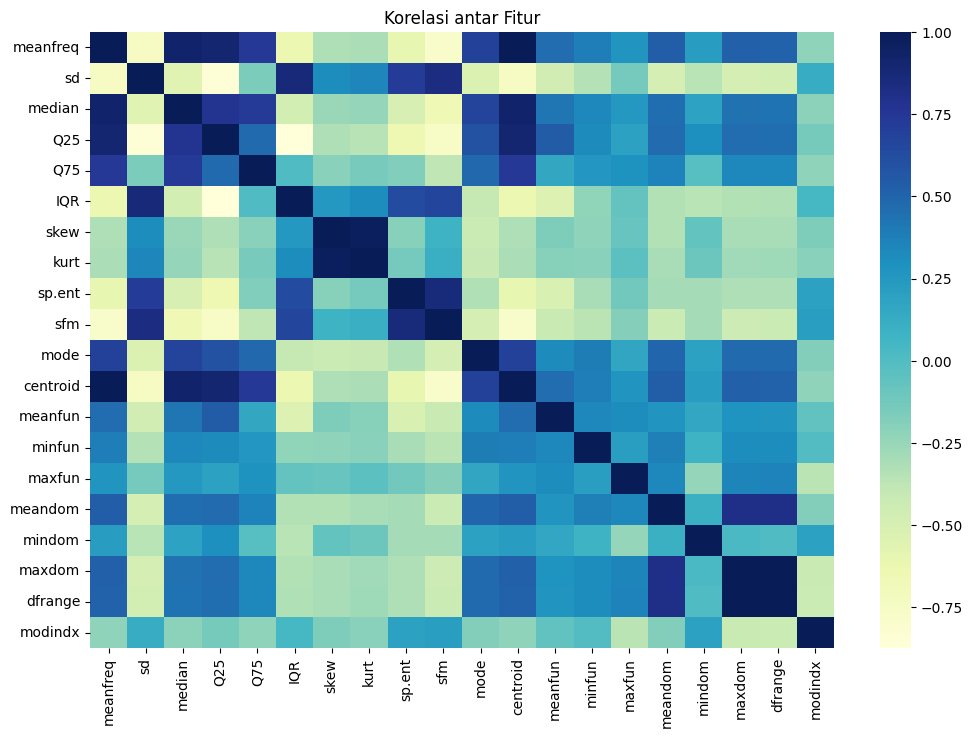

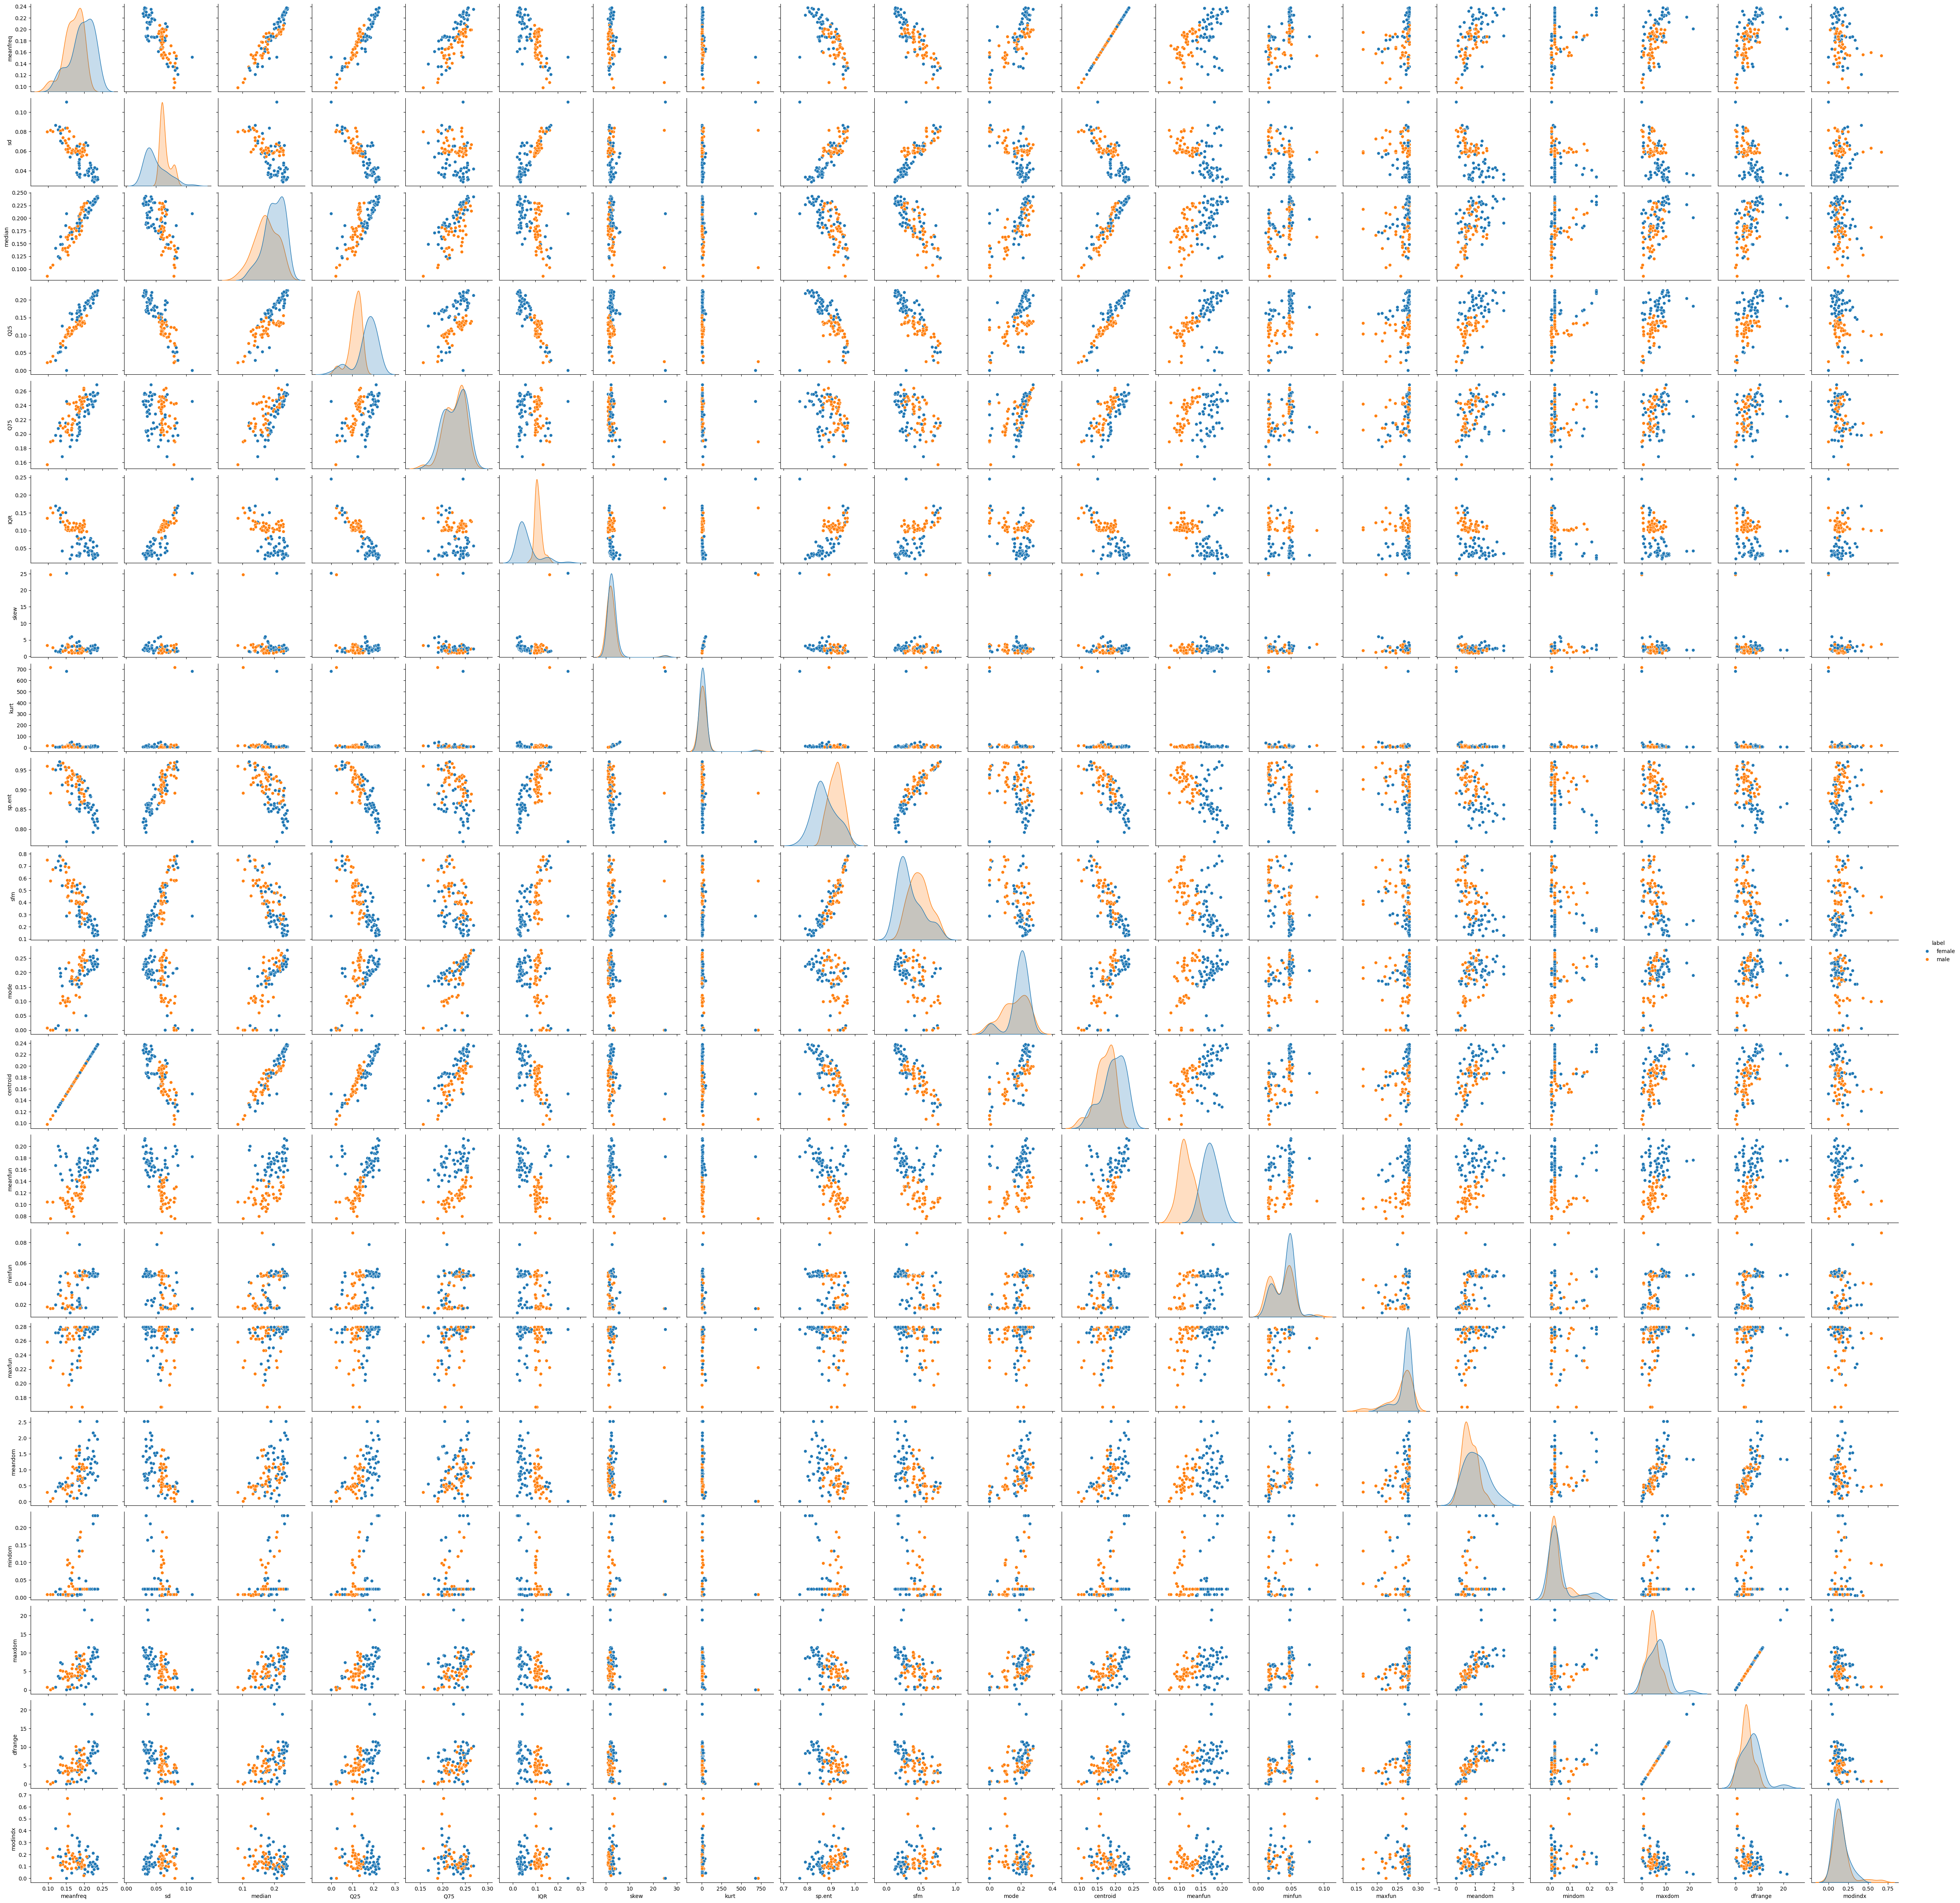

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap korelasi
plt.figure(figsize=(12,8))
sns.heatmap(data.drop('label', axis=1).corr(), cmap='YlGnBu')
plt.title('Korelasi antar Fitur')
plt.show()

# Pairplot (sampling 100 data agar tidak berat)
sns.pairplot(data.sample(100), hue='label')
plt.show()

### Langkah 4 — Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = data.drop(columns=['label'])
y = data['label']

# Ubah label ke bentuk numerik
y = y.map({'male': 0, 'female': 1})

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Langkah 5 — Buat Model kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Gunakan K = 5 (contoh awal)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Langkah 6 — Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi data test
y_pred = knn.predict(X_test)

# Evaluasi performa
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9747634069400631
Confusion Matrix:
 [[465  11]
 [ 13 462]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       476
           1       0.98      0.97      0.97       475

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



### Langkah 7 — Optimasi Nilai K

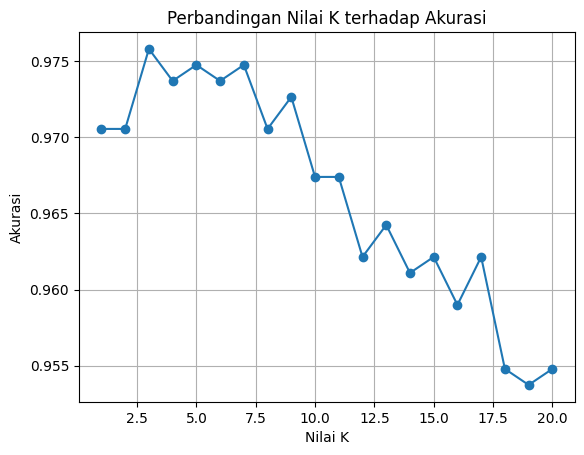

Nilai K terbaik: 3 dengan akurasi 0.9758


In [ ]:
acc = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 21), acc, marker='o')
plt.title('Perbandingan Nilai K terhadap Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Cetak nilai K terbaik
best_k = acc.index(max(acc)) + 1
print(f'Nilai K terbaik: {best_k} dengan akurasi {max(acc):.4f}')


### Langkah 8 — Analisis Fitur Optimal

In [ ]:
fitur_optimal = ['meanfun', 'minfun', 'maxfun']
X_opt = data[fitur_optimal]

# Split & Standarisasi ulang
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Uji model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print("Akurasi (fitur optimal):", knn.score(X_test, y_test))


Akurasi (fitur optimal): 0.9516298633017876


#TUGAS 2

### Langkah 1 — Load Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')

# Cek struktur data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

###Langkah 2 — Preprocessing Data

In [ ]:
# Rename columns to 'Text' and 'Labels'
df.columns = ['Text', 'Labels', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop unnecessary columns
df = df[['Text', 'Labels']]

# Mapping for spam and ham labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Apply mapping to the 'Labels' column
df['Labels'] = df['Labels'].map(new_labels)

# Ambil kolom teks dan label
X = df['Text'].values
y = df['Labels'].values

# Split data (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Langkah 3 — Model 1: Multinomial Naive Bayes + CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Buat fitur CountVectorizer dengan stop_words Inggris
cv = CountVectorizer(stop_words='english')

# Transformasi teks menjadi fitur numerik
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Inisiasi dan latih model
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Prediksi
y_pred_cv = mnb_cv.predict(X_test_cv)

# Evaluasi
print("=== CountVectorizer + MultinomialNB ===")
print("Akurasi:", accuracy_score(y_test, y_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cv))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_cv))

=== CountVectorizer + MultinomialNB ===
Akurasi: 0.007174887892376682
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Laporan Klasifikasi:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

### Langkah 4 — Model 2: Multinomial Naive Bayes + TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat fitur TF-IDF dengan stop_words Inggris
tfidf = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi fitur TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Inisiasi dan latih model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluasi
print("=== TF-IDF + MultinomialNB ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_tfidf))


=== TF-IDF + MultinomialNB ===
Akurasi: 0.007174887892376682
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Laporan Klasifikasi:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

###Langkah 5 — Visualisasi Perbandingan Akurasi

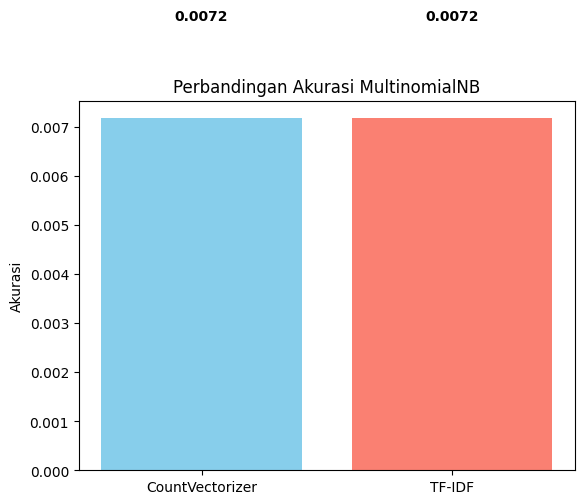

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Hitung akurasi
acc_cv = accuracy_score(y_test, y_pred_cv)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Buat bar chart
plt.bar(['CountVectorizer', 'TF-IDF'], [acc_cv, acc_tfidf], color=['skyblue', 'salmon'])
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi MultinomialNB')

# Tambahkan nilai akurasi di atas batang
for i, acc in enumerate([acc_cv, acc_tfidf]):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center', fontsize=10, fontweight='bold')

# Tampilkan grafik
plt.show()

